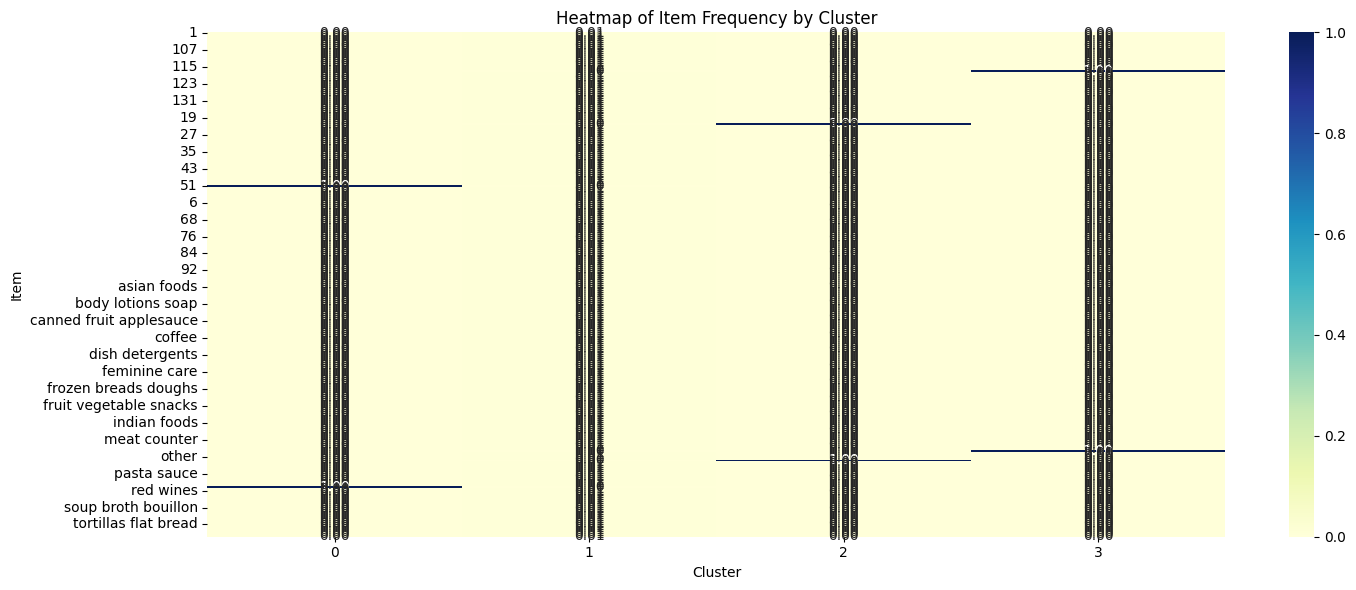

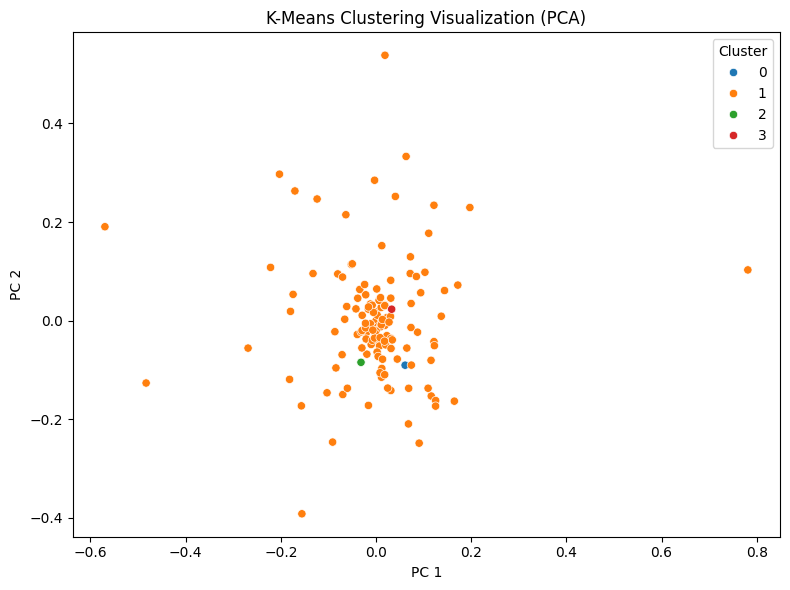

In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("10. Market Basket Analysis.csv")

# Preprocess into transactions
transactions = []
for _, row in df.iterrows():
    items = [str(i).strip() for i in row if pd.notna(i)]
    transactions.append(items)

# One-hot encode
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply K-Means clustering (you can change n_clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# Heatmap of average item presence per cluster
cluster_profile = df_encoded.groupby('Cluster').mean()

plt.figure(figsize=(15, 6))
sns.heatmap(cluster_profile.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Item Frequency by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

# Optional: Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded.drop(columns='Cluster'))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_encoded['Cluster'], palette='tab10')
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()